# Imports and load data

In [2]:
import sys, os
sys.path.append(os.path.abspath(".."))

import numpy as np
import matplotlib.pylab as plt
from src.dataset import Dataset
from src.softdtw_barycenter import softdtw_barycenter

ds = Dataset("Gun_Point")
X_tr, y_tr, X_te, y_te = ds.load_dataset()

Loading UCR dataset: Gun_Point


# Compute barycenters

In [3]:
ds = Dataset("Gun_Point")
X_train, y_train, X_test, y_test = ds.load_dataset()

chosen_class = 2
X_pair, cls = ds.sample_by_class(cls=chosen_class, n=2, split="train", seed=42)

X1 = X_pair[0].reshape(-1, 1)
X2 = X_pair[1].reshape(-1, 1)

print(f"Classe choisie : {cls}")

first_case  = 0.25*X1 + 0.75*X2
second_case = 0.50*X1 + 0.50*X2
third_case  = 0.75*X1 + 0.25*X2


barycenter_1 = softdtw_barycenter([X1, X2], first_case,  gamma=1.0, max_iter=100, weights=[0.25, 0.75])
barycenter_2 = softdtw_barycenter([X1, X2], second_case, gamma=1.0, max_iter=100, weights=[0.50, 0.50])
barycenter_3 = softdtw_barycenter([X1, X2], third_case,  gamma=1.0, max_iter=100, weights=[0.75, 0.25])


Loading UCR dataset: Gun_Point
Classe choisie : 2


# Plot interpolation

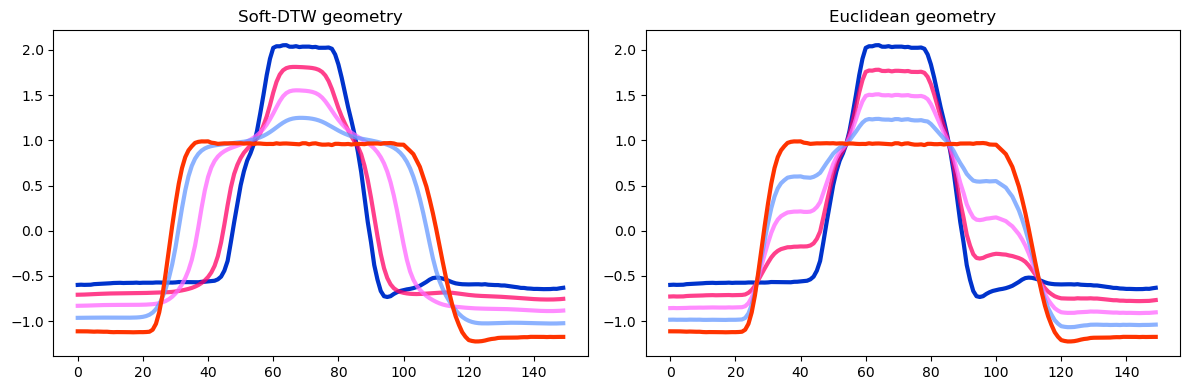

In [4]:
colors = {
    "X1": (0.0, 51./255, 204./255),
    "bary3": (102./255, 153./255, 255./255),
    "bary2": (255./255, 102./255, 255./255),
    "bary1": (255./255, 0, 102./255),
    "X2": (1.0, 51./255, 0)
}

def plot_interpolation(ax, X1, X2, mid1, mid2, mid3, title):
    ax.plot(X1.ravel(),       c=colors["X1"],           lw=3, label="X1")
    ax.plot(mid1,             c=colors["bary1"], lw=3, alpha=0.75)
    ax.plot(mid2,             c=colors["bary2"], lw=3, alpha=0.75)
    ax.plot(mid3,             c=colors["bary3"], lw=3, alpha=0.75)
    ax.plot(X2.ravel(),       c=colors["X2"],           lw=3, label="X2")

    ax.set_title(title)
    ax.grid(False)


fig, axes = plt.subplots(1, 2, figsize=(12, 4))


plot_interpolation(
    axes[0],
    X1, X2,
    barycenter_3, barycenter_2, barycenter_1,
    "Soft-DTW geometry"
)


plot_interpolation(
    axes[1],
    X1, X2,
    third_case, second_case, first_case,
    "Euclidean geometry"
)

plt.tight_layout()
plt.show()
